# Figure 1: Response vs Next Response plot

## Settings

Decide on the following:
* Which dataset to plot (e.g. `olist_brazilian_ecommerce_customer_order_view`, `olist_brazilian_ecommerce_customer_order_item_view`, `uci_online_retail_ii_customer_order_view`, `uci_online_retail_ii_customer_order_item_view`)
* Which response column's value we are using (e.g. `r_BasketValue`, `r_BasketSize`, `r_SellingPrice`), make sure your dataset contains the response column, or else the code will throw an error
* Whether one should normalize the value in the response column by its mean
* The size (in inches) of the figures generated

In [1]:
dataset_name = 'olist_brazilian_ecommerce_customer_order_view'
# dataset_name = 'uci_online_retail_ii_customer_order_view'

# response_col = 'r_BasketValue'
response_col = 'r_BasketSize'

normalize = True
figsize = 2

------

In [2]:
import seaborn as sns

from oce_ecomm_abv_calculation.datasets.default_datasets import get_default_dataset_by_name
from oce_ecomm_abv_calculation.plots.response_vs_next_response import (
    append_next_analysis_unit_under_same_randomization_unit, 
    get_plot_params, 
    next_col_name,
    output_file_path,
    hist_zoomed_out_plot,
    hist_zoomed_in_plot,
    kde_plot
)

In [3]:
dataset_df = (
    append_next_analysis_unit_under_same_randomization_unit(
        get_default_dataset_by_name(dataset_name),
        normalize_response_cols=normalize
    )
)
plot_dataset_df = dataset_df[dataset_df[next_col_name("AnalysisUnitId")].notnull()]

plot_params = get_plot_params(dataset_name=dataset_name, 
                              response_col=response_col,
                              normalize=normalize)

## 2-D histogram

Showing the both the marginal and joint distributions between the value/size of a transaction and the next transaction (if any) made by the same user.

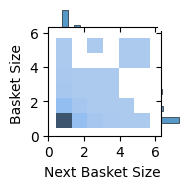

In [4]:
dark_rayfish_plot = (
    hist_zoomed_out_plot(
        plot_dataset_df=plot_dataset_df,
        plot_params=plot_params,
        response_col=response_col,
        size=figsize
    )
)

if normalize:
    if ("olist" in dataset_name) and (response_col == "r_BasketSize"):
        dark_rayfish_plot.ax_joint.set(xticks=[0,2,4,6], yticks=[0,2,4,6])
    else:
        dark_rayfish_plot.ax_joint.set(xticks=[0,1,2,3], yticks=[0,1,2,3])

dark_rayfish_plot.savefig(
    output_file_path(dataset_name, response_col, normalize, plot_type="histzout")
)

## Zoomed-in 2-D Histogram

Showing the high joint density region.

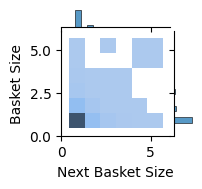

In [5]:
dark_rayfish_baby_plot = (
    hist_zoomed_in_plot(
        plot_dataset_df=plot_dataset_df,
        plot_params=plot_params,
        response_col=response_col,
        size=figsize
    )
)

dark_rayfish_baby_plot.savefig(
    output_file_path(dataset_name, response_col, normalize, plot_type="histzin")
)

## Kernel Density Estimation (KDE) Plot

Around 10% of the data points lie betwen two successive contours.

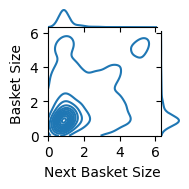

In [6]:
light_rayfish_plot = (
    kde_plot(
        plot_dataset_df=plot_dataset_df,
        plot_params=plot_params,
        response_col=response_col,
        size=figsize
    )
)

if normalize:
    if ("olist" in dataset_name) and (response_col == "r_BasketSize"):
        light_rayfish_plot.ax_joint.set(xticks=[0,2,4,6], yticks=[0,2,4,6])
    else:
        light_rayfish_plot.ax_joint.set(xticks=[0,1,2,3], yticks=[0,1,2,3])

light_rayfish_plot.savefig(
    output_file_path(dataset_name, response_col, normalize, plot_type="kde")
)